In [1]:

from pyspark.sql import Row
from pyspark.sql import SQLContext
from pyspark import SparkFiles
from pyspark.ml.linalg import DenseVector
from sklearn.metrics import accuracy_score
import pandas as pd


import pyspark
from pyspark import SparkContext


import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report,recall_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import roc_curve,precision_recall_curve
from sklearn.metrics import roc_auc_score,confusion_matrix

/Users/chettykulkarni/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
sc =SparkContext()
sc.addFile("H-1B_Disclosure_Data_FY2019.csv")

In [3]:
sqlContext = SQLContext(sc)
sqlContext
df = sqlContext.read.csv(SparkFiles.get("H-1B_Disclosure_Data_FY2019.csv"), header=True, inferSchema= True)


In [4]:
df.groupBy('CASE_STATUS').count().show()


len(df.columns)

+-------------------+------+
|        CASE_STATUS| count|
+-------------------+------+
|          CERTIFIED|597831|
|CERTIFIED-WITHDRAWN| 41218|
|          WITHDRAWN| 19674|
|             DENIED|  5893|
+-------------------+------+



73

In [5]:
cols=['CASE_NUMBER','DECISION_DATE','ORIGINAL_CERT_DATE','EMPLOYER_BUSINESS_DBA','EMPLOYER_ADDRESS','EMPLOYER_CITY']
col2=['EMPLOYER_PROVINCE','EMPLOYER_PHONE','EMPLOYER_PHONE_EXT','SECONDARY_ENTITY','SECONDARY_ENTITY_BUSINESS_NAME']
col3=['SECONDARY_ENTITY', 'SECONDARY_ENTITY_BUSINESS_NAME', 'AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE']
col4=['SECONDARY_ENTITY', 'SECONDARY_ENTITY_BUSINESS_NAME', 'AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE']
col5=['VISA_CLASS','EMPLOYER_COUNTRY','WAGE_RATE_OF_PAY_FROM','WAGE_UNIT_OF_PAY','PW_SOURCE','PW_SOURCE_OTHER','PW_WAGE_LEVEL','WORKSITE_POSTAL_CODE','WORKSITE_CITY','WAGE_RATE_OF_PAY_TO','SOC_NAME','CASE_SUBMITTED','WORKSITE_POSTAL_CODE','STATUTORY_BASIS','EMPLOYER_POSTAL_CODE','APPX_A_NO_OF_EXEMPT_WORKER_1','APPX_A_NAME_OF_INSTITUTION_1','APPX_A_FIELD_OF_STUDY_1', 'APPX_A_DATE_OF_DEGREE_1', 'APPX_A_NO_OF_EXEMPT_WORKER_2', 'APPX_A_NAME_OF_INSTITUTION_2', 'APPX_A_FIELD_OF_STUDY_2', 'APPX_A_DATE_OF_DEGREE_2', 'APPX_A_NO_OF_EXEMPT_WORKER_3', 'APPX_A_NAME_OF_INSTITUTION_3', 'APPX_A_FIELD_OF_STUDY_3', 'APPX_A_DATE_OF_DEGREE_3', 'APPX_A_NO_OF_EXEMPT_WORKER_4', 'APPX_A_NAME_OF_INSTITUTION_4', 'APPX_A_FIELD_OF_STUDY_4', 'APPX_A_DATE_OF_DEGREE_4', 'APPX_A_NO_OF_EXEMPT_WORKER_5', 'APPX_A_NAME_OF_INSTITUTION_5', 'APPX_A_FIELD_OF_STUDY_5', 'APPX_A_DATE_OF_DEGREE_5','MASTERS_EXEMPTION']

df2=df.drop(*cols)
df2=df2.drop(*col2)
df2=df2.drop(*col3)
df2=df2.drop(*col4)
df2=df2.drop(*col5)

print(df2.printSchema())


# 'CASE_STATUS', 'CASE_SUBMITTED', 'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY', 'JOB_TITLE', 'SOC_CODE', 'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'AMENDED_PETITION', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'PW_WAGE_LEVEL', 'PW_SOURCE', 'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY', 'H1B_DEPENDENT', 'WORKSITE_STATE', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'STATUTORY_BASIS',

# 'APPX_A_FIELD_OF_STUDY_1', 'APPX_A_DATE_OF_DEGREE_1', 'APPX_A_NO_OF_EXEMPT_WORKER_2', 'APPX_A_NAME_OF_INSTITUTION_2', 'APPX_A_FIELD_OF_STUDY_2', 'APPX_A_DATE_OF_DEGREE_2', 'APPX_A_NO_OF_EXEMPT_WORKER_3', 'APPX_A_NAME_OF_INSTITUTION_3', 'APPX_A_FIELD_OF_STUDY_3', 'APPX_A_DATE_OF_DEGREE_3', 'APPX_A_NO_OF_EXEMPT_WORKER_4', 'APPX_A_NAME_OF_INSTITUTION_4', 'APPX_A_FIELD_OF_STUDY_4', 'APPX_A_DATE_OF_DEGREE_4', 'APPX_A_NO_OF_EXEMPT_WORKER_5', 'APPX_A_NAME_OF_INSTITUTION_5', 'APPX_A_FIELD_OF_STUDY_5', 'APPX_A_DATE_OF_DEGREE_5','MASTERS_EXEMPTION'






root
 |-- CASE_STATUS: string (nullable = true)
 |-- EMPLOYMENT_START_DATE: string (nullable = true)
 |-- EMPLOYMENT_END_DATE: string (nullable = true)
 |-- EMPLOYER_NAME: string (nullable = true)
 |-- EMPLOYER_STATE: string (nullable = true)
 |-- JOB_TITLE: string (nullable = true)
 |-- SOC_CODE: string (nullable = true)
 |-- NAICS_CODE: integer (nullable = true)
 |-- TOTAL_WORKERS: integer (nullable = true)
 |-- NEW_EMPLOYMENT: string (nullable = true)
 |-- CONTINUED_EMPLOYMENT: string (nullable = true)
 |-- CHANGE_PREVIOUS_EMPLOYMENT: integer (nullable = true)
 |-- NEW_CONCURRENT_EMPLOYMENT: integer (nullable = true)
 |-- CHANGE_EMPLOYER: integer (nullable = true)
 |-- AMENDED_PETITION: integer (nullable = true)
 |-- FULL_TIME_POSITION: string (nullable = true)
 |-- PREVAILING_WAGE: string (nullable = true)
 |-- PW_UNIT_OF_PAY: string (nullable = true)
 |-- H1B_DEPENDENT: string (nullable = true)
 |-- WORKSITE_COUNTY: string (nullable = true)
 |-- WORKSITE_STATE: string (nullable = 

In [6]:
pd_df=df2.toPandas()

In [7]:
len(set(pd_df.EMPLOYER_NAME))

70364

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = pd_df.corr()
corr

,NAICS_CODE,TOTAL_WORKERS,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION
NAICS_CODE,1.000000,-0.102236,-0.094351,-0.037142,-0.028108,-0.112970
TOTAL_WORKERS,-0.102236,1.000000,0.569345,0.374866,0.504069,0.597364
CHANGE_PREVIOUS_EMPLOYMENT,-0.094351,0.569345,1.000000,0.233980,0.411627,0.517552
NEW_CONCURRENT_EMPLOYMENT,-0.037142,0.374866,0.233980,1.000000,0.300599,0.292767
CHANGE_EMPLOYER,-0.028108,0.504069,0.411627,0.300599,1.000000,0.516583
AMENDED_PETITION,-0.112970,0.597364,0.517552,0.292767,0.516583,1.000000


In [9]:
pd_df.isnull().sum(axis=0)

CASE_STATUS                        0
EMPLOYMENT_START_DATE              0
EMPLOYMENT_END_DATE                0
EMPLOYER_NAME                      1
EMPLOYER_STATE                    41
JOB_TITLE                          1
SOC_CODE                           4
NAICS_CODE                         2
TOTAL_WORKERS                      0
NEW_EMPLOYMENT                     0
CONTINUED_EMPLOYMENT               0
CHANGE_PREVIOUS_EMPLOYMENT         0
NEW_CONCURRENT_EMPLOYMENT          0
CHANGE_EMPLOYER                    0
AMENDED_PETITION                   0
FULL_TIME_POSITION                 0
PREVAILING_WAGE                83662
PW_UNIT_OF_PAY                 83662
H1B_DEPENDENT                  15074
WORKSITE_COUNTY                   46
WORKSITE_STATE                    18
WILLFUL_VIOLATOR               15079
SUPPORT_H1B                   378454
dtype: int64

In [10]:
pd_df['WILLFUL_VIOLATOR']=pd_df['WILLFUL_VIOLATOR'].fillna('N')
pd_df['SUPPORT_H1B']=pd_df['SUPPORT_H1B'].fillna('N')

pd_df['SUPPORT_H1B']=pd_df['SUPPORT_H1B'].replace('NA','N')

pd_df['SUPPORT_H1B']=pd_df['SUPPORT_H1B'].replace('N',0)

pd_df['SUPPORT_H1B']=pd_df['SUPPORT_H1B'].replace('Y',1)

pd_df['WILLFUL_VIOLATOR']=pd_df['WILLFUL_VIOLATOR'].replace('N',0)

pd_df['WILLFUL_VIOLATOR']=pd_df['WILLFUL_VIOLATOR'].replace('Y',1)



pd_df['H1B_DEPENDENT']=pd_df['H1B_DEPENDENT'].fillna('N')

pd_df['H1B_DEPENDENT']=pd_df['H1B_DEPENDENT'].replace('NA','N')

pd_df['H1B_DEPENDENT']=pd_df['H1B_DEPENDENT'].replace('N',0)

pd_df['H1B_DEPENDENT']=pd_df['H1B_DEPENDENT'].replace('Y',1)


pd_df['H1B_DEPENDENT']=pd_df['H1B_DEPENDENT'].fillna('N')

In [11]:
pd_df=pd_df.dropna()

In [12]:
pd_df.isnull().sum(axis=0)

CASE_STATUS                   0
EMPLOYMENT_START_DATE         0
EMPLOYMENT_END_DATE           0
EMPLOYER_NAME                 0
EMPLOYER_STATE                0
JOB_TITLE                     0
SOC_CODE                      0
NAICS_CODE                    0
TOTAL_WORKERS                 0
NEW_EMPLOYMENT                0
CONTINUED_EMPLOYMENT          0
CHANGE_PREVIOUS_EMPLOYMENT    0
NEW_CONCURRENT_EMPLOYMENT     0
CHANGE_EMPLOYER               0
AMENDED_PETITION              0
FULL_TIME_POSITION            0
PREVAILING_WAGE               0
PW_UNIT_OF_PAY                0
H1B_DEPENDENT                 0
WORKSITE_COUNTY               0
WORKSITE_STATE                0
WILLFUL_VIOLATOR              0
SUPPORT_H1B                   0
dtype: int64

In [13]:
pd_df

,CASE_STATUS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,SOC_CODE,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,...,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_COUNTY,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B
1,DENIED,11/27/18,11/26/21,UNIVERSITY OF TEXAS AT DALLAS,TX,PROGRAM SPECIALIST,19-1042,611310.0,1,1,...,0,0,Y,"$48,630.00",Year,0,TX,TX,0,0
2,DENIED,11/28/18,11/27/21,UNIVERSITY OF TEXAS AT DALLAS,TX,ASSISTANT PROFESSOR,25-1011,611310.0,1,1,...,0,0,Y,"$79,287.00",Year,0,Dallas,TX,0,0
3,DENIED,1/1/19,1/1/22,BILLY R. WINGARD,NC,HOME HEALTH & PERSONAL CARE AIDE,39-9021,814110.0,1,1,...,0,0,Y,$7.95,Hour,0,Craven,NC,0,0
4,CERTIFIED,4/1/19,4/1/22,"COATES,BRIGHT & BAY LLC",FL,CARE GIVER-LIVE IN- MANAGER,31-9099,621610.0,1,1,...,0,0,Y,$8.46,Hour,1,florida,FL,0,0
5,DENIED,4/8/19,4/7/21,BOWLING GREEN CHRISTIAN ACADEMY,KY,EARLY EDUCATION CLASSROOM ASSISTANT,25-2011,611110.0,1,1,...,0,0,Y,$7.25,Hour,0,19,KY,0,0
6,DENIED,1/1/20,12/31/22,GREEN MEADOW SCHOOL,MP,"TEACHER, ELEMENTARY/SECONDARY",25-3099,61111.0,1,0,...,0,0,Y,$9.28,Hour,0,SAIPAN,MP,0,0
7,CERTIFIED,1/1/20,12/31/22,GREEN MEADOW SCHOOL,MP,"TEACHER, ELEMENTARY/SECONDARY",25-3099,61111.0,1,0,...,0,0,Y,$9.28,Hour,0,SAIPAN,MP,0,0
8,DENIED,12/12/18,12/12/21,NAIL PASSION LLC,FL,"CUSTOMER SERVICE, ALL TASKS & DUTIES OF A NAIL...",39-5092,812113.0,10,10,...,0,0,Y,$8.75,Hour,0,BROWARD,FL,0,0
9,DENIED,7/1/19,6/30/22,OUTBOARD SERVICE COMPANY,MN,SPECIALTY TECHNICIAN,49-3023,441222.0,1,1,...,0,0,Y,$9.86,Hour,0,Cass,MN,0,0
10,CERTIFIED,4/15/19,5/30/19,WARREN COUNTY BOARD OF EDUCATION,KY,EMERGENCY SUBSTITUTE TEACHER,25-3098,611110.0,1,1,...,0,0,N,$9.53,Hour,0,Warren,KY,0,0


In [14]:
corr_df=pd_df[['CASE_STATUS','EMPLOYER_NAME','JOB_TITLE','SOC_CODE','TOTAL_WORKERS','PREVAILING_WAGE','AMENDED_PETITION','CONTINUED_EMPLOYMENT']]

corr=corr_df.apply(lambda x: x.factorize()[0]).corr()
corr

,CASE_STATUS,EMPLOYER_NAME,JOB_TITLE,SOC_CODE,TOTAL_WORKERS,PREVAILING_WAGE,AMENDED_PETITION,CONTINUED_EMPLOYMENT
CASE_STATUS,1.000000,0.004261,0.001449,0.000685,-0.024385,-0.007880,-0.019275,-0.027059
EMPLOYER_NAME,0.004261,1.000000,0.214273,-0.036086,-0.043899,0.158018,-0.069788,-0.026035
JOB_TITLE,0.001449,0.214273,1.000000,0.019271,-0.009348,0.252249,0.005882,0.027527
SOC_CODE,0.000685,-0.036086,0.019271,1.000000,-0.002775,0.222712,0.019292,0.029862
TOTAL_WORKERS,-0.024385,-0.043899,-0.009348,-0.002775,1.000000,0.038185,0.550692,0.456735
PREVAILING_WAGE,-0.007880,0.158018,0.252249,0.222712,0.038185,1.000000,0.057891,0.085693
AMENDED_PETITION,-0.019275,-0.069788,0.005882,0.019292,0.550692,0.057891,1.000000,0.515689
CONTINUED_EMPLOYMENT,-0.027059,-0.026035,0.027527,0.029862,0.456735,0.085693,0.515689,1.000000


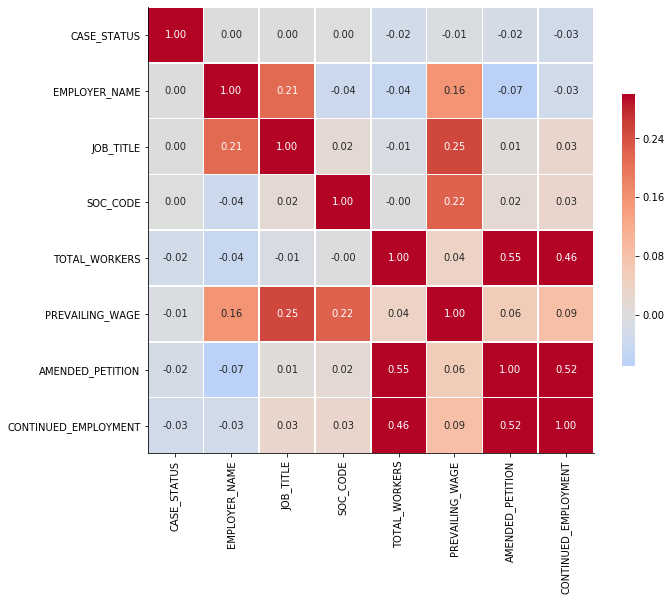

In [15]:
g = sns.heatmap(corr,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(10,10)
plt.show()

In [16]:
#  pd_df.to_csv(r'processed2019_latest.csv')

In [17]:
data_preprocess=pd_df[['PREVAILING_WAGE','PW_UNIT_OF_PAY']]

In [18]:
data_preprocess.PREVAILING_WAGE.replace('$','')

data_preprocess.PREVAILING_WAGE=data_preprocess.PREVAILING_WAGE.apply(lambda x: x.replace('$',''))
data_preprocess.PREVAILING_WAGE=data_preprocess.PREVAILING_WAGE.apply(lambda x: x.replace(',',''))

/Users/chettykulkarni/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
for i in data_preprocess:
    print(i)

PREVAILING_WAGE
PW_UNIT_OF_PAY


In [19]:
set(data_preprocess.PW_UNIT_OF_PAY)

{'Bi-Weekly', 'Hour', 'Month', 'Week', 'Year'}

In [19]:
z=[]
for index,row in data_preprocess.iterrows():
    if row.PW_UNIT_OF_PAY=='Year':
        z.append(1)
    elif row.PW_UNIT_OF_PAY=='Hour':
        z.append(1920)
    elif row.PW_UNIT_OF_PAY=='Month':
        z.append(12)
    elif row.PW_UNIT_OF_PAY=='Week':
        z.append(48)
    elif row.PW_UNIT_OF_PAY=='Bi-Weekly':
        z.append(96)
    else:
        z.append(0)


In [20]:
data_preprocess['multiplier']=z

/Users/chettykulkarni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
data_preprocess['PREVAILING_WAGE_int']=pd.to_numeric(data_preprocess.PREVAILING_WAGE)
data_preprocess['new_wage_in_dollar_per_year']=(data_preprocess.PREVAILING_WAGE_int)*data_preprocess.multiplier

/Users/chettykulkarni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/chettykulkarni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
pd_df['TOTAL_WAGE']=data_preprocess.new_wage_in_dollar_per_year

In [34]:
# pd_df=pd_df.drop(['PREVAILING_WAGE','PW_UNIT_OF_PAY'],axis=1)
pd_df



,CASE_STATUS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,SOC_CODE,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,...,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_COUNTY,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,TOTAL_WAGE
1,DENIED,11/27/18,11/26/21,UNIVERSITY OF TEXAS AT DALLAS,TX,PROGRAM SPECIALIST,19-1042,611310.0,1,1,...,0,Y,"$48,630.00",Year,0,TX,TX,0,0,48630.0
2,DENIED,11/28/18,11/27/21,UNIVERSITY OF TEXAS AT DALLAS,TX,ASSISTANT PROFESSOR,25-1011,611310.0,1,1,...,0,Y,"$79,287.00",Year,0,Dallas,TX,0,0,79287.0
3,DENIED,1/1/19,1/1/22,BILLY R. WINGARD,NC,HOME HEALTH & PERSONAL CARE AIDE,39-9021,814110.0,1,1,...,0,Y,$7.95,Hour,0,Craven,NC,0,0,15264.0
4,CERTIFIED,4/1/19,4/1/22,"COATES,BRIGHT & BAY LLC",FL,CARE GIVER-LIVE IN- MANAGER,31-9099,621610.0,1,1,...,0,Y,$8.46,Hour,1,florida,FL,0,0,16243.2
5,DENIED,4/8/19,4/7/21,BOWLING GREEN CHRISTIAN ACADEMY,KY,EARLY EDUCATION CLASSROOM ASSISTANT,25-2011,611110.0,1,1,...,0,Y,$7.25,Hour,0,19,KY,0,0,13920.0
6,DENIED,1/1/20,12/31/22,GREEN MEADOW SCHOOL,MP,"TEACHER, ELEMENTARY/SECONDARY",25-3099,61111.0,1,0,...,0,Y,$9.28,Hour,0,SAIPAN,MP,0,0,17817.6
7,CERTIFIED,1/1/20,12/31/22,GREEN MEADOW SCHOOL,MP,"TEACHER, ELEMENTARY/SECONDARY",25-3099,61111.0,1,0,...,0,Y,$9.28,Hour,0,SAIPAN,MP,0,0,17817.6
8,DENIED,12/12/18,12/12/21,NAIL PASSION LLC,FL,"CUSTOMER SERVICE, ALL TASKS & DUTIES OF A NAIL...",39-5092,812113.0,10,10,...,0,Y,$8.75,Hour,0,BROWARD,FL,0,0,16800.0
9,DENIED,7/1/19,6/30/22,OUTBOARD SERVICE COMPANY,MN,SPECIALTY TECHNICIAN,49-3023,441222.0,1,1,...,0,Y,$9.86,Hour,0,Cass,MN,0,0,18931.2
10,CERTIFIED,4/15/19,5/30/19,WARREN COUNTY BOARD OF EDUCATION,KY,EMERGENCY SUBSTITUTE TEACHER,25-3098,611110.0,1,1,...,0,N,$9.53,Hour,0,Warren,KY,0,0,18297.6


In [23]:
pd_df.columns

Index(['CASE_STATUS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE',
       'EMPLOYER_NAME', 'EMPLOYER_STATE', 'JOB_TITLE', 'SOC_CODE',
       'NAICS_CODE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'H1B_DEPENDENT', 'WORKSITE_COUNTY',
       'WORKSITE_STATE', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'TOTAL_WAGE'],
      dtype='object')

In [24]:
pd_df2 = pd_df.drop(pd_df[(pd_df.CASE_STATUS =='CERTIFIED-WITHDRAWN')].index)
pd_df2 = pd_df2.drop(pd_df2[(pd_df2.CASE_STATUS =='WITHDRAWN')].index)

set(pd_df2.CASE_STATUS)

{'CERTIFIED', 'DENIED'}

In [26]:
pd_df2=pd_df2.drop([ 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'WORKSITE_COUNTY',
       'WORKSITE_STATE','EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE'], axis=1)

pd_df2=pd_df2.drop([ 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION','JOB_TITLE','SUPPORT_H1B'], axis=1)

In [28]:
pd_df2

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,TOTAL_WORKERS,FULL_TIME_POSITION,H1B_DEPENDENT,WILLFUL_VIOLATOR,TOTAL_WAGE
1,DENIED,UNIVERSITY OF TEXAS AT DALLAS,TX,19-1042,611310.0,1,Y,0,0,48630.0
2,DENIED,UNIVERSITY OF TEXAS AT DALLAS,TX,25-1011,611310.0,1,Y,0,0,79287.0
3,DENIED,BILLY R. WINGARD,NC,39-9021,814110.0,1,Y,0,0,15264.0
4,CERTIFIED,"COATES,BRIGHT & BAY LLC",FL,31-9099,621610.0,1,Y,1,0,16243.2
5,DENIED,BOWLING GREEN CHRISTIAN ACADEMY,KY,25-2011,611110.0,1,Y,0,0,13920.0
6,DENIED,GREEN MEADOW SCHOOL,MP,25-3099,61111.0,1,Y,0,0,17817.6
7,CERTIFIED,GREEN MEADOW SCHOOL,MP,25-3099,61111.0,1,Y,0,0,17817.6
8,DENIED,NAIL PASSION LLC,FL,39-5092,812113.0,10,Y,0,0,16800.0
9,DENIED,OUTBOARD SERVICE COMPANY,MN,49-3023,441222.0,1,Y,0,0,18931.2
10,CERTIFIED,WARREN COUNTY BOARD OF EDUCATION,KY,25-3098,611110.0,1,N,0,0,18297.6


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x=pd_df2
for i in x:
    x[i]=le.fit_transform(x[i])

In [69]:
result = pd.concat([pd_df, x], axis=1, sort=False)



# result.to_csv(r'preprocessed_dump.csv')







In [68]:
emoloyer_distribution=pd_df[['CASE_STATUS','EMPLOYER_NAME']]


emoloyer_distribution_counts=emoloyer_distribution.groupby(['EMPLOYER_NAME','CASE_STATUS']).agg({'CASE_STATUS':['count']})
emoloyer_distribution_counts.columns=['Counts']
emoloyer_distribution_counts.reset_index()
emoloyer_distribution_counts.sort_values(by='Counts',ascending=False)

,,Counts
EMPLOYER_NAME,CASE_STATUS,
COGNIZANT TECHNOLOGY SOLUTIONS US CORP,CERTIFIED,24783
INFOSYS LIMITED,CERTIFIED,20324
TATA CONSULTANCY SERVICES LIMITED,CERTIFIED,10524
GOOGLE LLC,CERTIFIED,8891
ERNST & YOUNG U.S. LLP,CERTIFIED,7520
CAPGEMINI AMERICA INC,CERTIFIED,7255
"AMAZON.COM SERVICES, INC.",CERTIFIED,5952
DELOITTE CONSULTING LLP,CERTIFIED,5880
ACCENTURE LLP,CERTIFIED,5004


In [30]:
set(x.CASE_STATUS)

{0, 1}

In [29]:
x

,CASE_STATUS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,SOC_CODE,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,...,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_COUNTY,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,TOTAL_WAGE
1,1,121,330,59686,48,55235,183,1792,1,1,...,0,1,13688,4,0,4821,47,0,0,3595
2,1,123,334,59686,48,5346,240,1792,1,1,...,0,1,20405,4,0,1266,47,0,0,10563
3,1,0,3,7603,30,32408,420,1932,1,1,...,0,1,18545,1,0,1117,30,0,0,4
4,0,314,768,12607,9,13397,398,1827,1,1,...,0,1,20579,1,1,5441,9,0,0,8
5,1,342,865,8589,19,24249,278,1790,1,1,...,0,1,18544,1,0,40,18,0,0,2
6,1,1,479,24238,27,92937,294,689,1,0,...,0,1,22446,1,0,4074,27,0,0,21
7,0,1,479,24238,27,92937,294,689,1,0,...,0,1,22446,1,0,4074,27,0,0,21
8,1,142,390,38480,9,17898,416,1908,10,2,...,0,1,20580,1,0,455,9,0,0,9
9,1,405,1079,41985,25,84563,490,1440,1,1,...,0,1,22451,1,0,933,25,0,0,39
10,0,320,959,61842,19,25295,293,1790,1,1,...,0,0,22448,1,0,5164,18,0,0,28


In [30]:
y=x.CASE_STATUS

# x=x.drop([ 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'WORKSITE_COUNTY',
#        'WORKSITE_STATE','EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE'], axis=1)

# x=x.drop([ 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
#        'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
#        'CHANGE_EMPLOYER', 'AMENDED_PETITION','JOB_TITLE','SUPPORT_H1B'], axis=1)

In [31]:
from sklearn.utils import resample

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0)

xTrain_downsampled = resample(xTrain[xTrain.CASE_STATUS==0],
                                      replace=True,  # sample with replacement
                                      n_samples=len(xTrain[xTrain.CASE_STATUS==1]),  # to match minority class
                                      random_state=1)

yTrain_downsampled = resample(yTrain[xTrain.CASE_STATUS==0],
                                      replace=True,  # sample with replacement
                                      n_samples=len(xTrain[xTrain.CASE_STATUS==1]),  # to match minority class
                                      random_state=1)

xTrain_downsampled_1 = pd.concat([xTrain_downsampled, xTrain[xTrain.CASE_STATUS==1]])
yTrain_downsampled_1 = pd.concat([xTrain_downsampled, xTrain[xTrain.CASE_STATUS==1]])

In [32]:
xTrain_downsampled_1.CASE_STATUS.value_counts()


1    3533
0    3533
Name: CASE_STATUS, dtype: int64

In [33]:
x=xTrain_downsampled_1
x2=x.drop(['CASE_STATUS'], axis=1)



yTrain=x.CASE_STATUS


corr = x2.corr()
corr

xTrain=x2
xTest=xTest.drop(['CASE_STATUS'], axis=1)

In [55]:
model=tree.DecisionTreeClassifier(criterion="entropy")


In [56]:
model.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
model2 = model.predict(xTest)
print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)


dtreeAccuracy=accuracy_score(yTest, model2)*100



confusion =confusion_matrix(yTest, model2)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
auc = roc_auc_score(yTest, model2)
specificity = TN / (TN + FP)



print('*'*45,'Dtree','*'*45)
print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)
print('classification error',(1 - accuracy_score(yTest, model2))*100)
print('sensitivity:',recall_score(yTest, model2))
print('False Positive Rate:',1 - specificity)
print('AUC: %.2f' % auc)
print('Confusion Matrix')
print(confusion_matrix(yTest,model2))

from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(model, 'dTree_Down.pkl')

              precision    recall  f1-score   support

           0       1.00      0.65      0.79    163860
           1       0.02      0.68      0.03      1552

    accuracy                           0.65    165412
   macro avg       0.51      0.66      0.41    165412
weighted avg       0.99      0.65      0.78    165412

The accuracy :-  64.98742533794403
********************************************* Dtree *********************************************
              precision    recall  f1-score   support

           0       1.00      0.65      0.79    163860
           1       0.02      0.68      0.03      1552

    accuracy                           0.65    165412
   macro avg       0.51      0.66      0.41    165412
weighted avg       0.99      0.65      0.78    165412

The accuracy :-  64.98742533794403
classification error 35.01257466205596
sensitivity: 0.6765463917525774
False Positive Rate: 0.35037837178078846
AUC: 0.66
Confusion Matrix
[[106447  57413]
 [   502   1050]]


/Users/chettykulkarni/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['dTree_Down.pkl']

In [59]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xTrain, yTrain)
neigh2 = neigh.predict(xTest)
#print(classification_report(yTest, neigh2))
print('The accuracy :- ',accuracy_score(yTest, neigh2)*100)

knnAccuracy=accuracy_score(yTest, model2)*100


model2=neigh2
confusion =confusion_matrix(yTest, model2)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
auc = roc_auc_score(yTest, model2)
specificity = TN / (TN + FP)


print('*'*45,'KNN','*'*45)
print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)
print('classification error',(1 - accuracy_score(yTest, model2))*100)
print('sensitivity:',recall_score(yTest, model2))
print('False Positive Rate:',1 - specificity)
print('AUC: %.2f' % auc)
print('Confusion Matrix')
print(confusion_matrix(yTest,model2))


from sklearn.externals import joblib 
# Save the model as a pickle in a file 
joblib.dump(neigh, 'Knn_Down.pkl')

The accuracy :-  62.36306918482335
********************************************* KNN *********************************************
              precision    recall  f1-score   support

           0       0.99      0.62      0.77    163860
           1       0.02      0.63      0.03      1552

    accuracy                           0.62    165412
   macro avg       0.50      0.63      0.40    165412
weighted avg       0.99      0.62      0.76    165412

The accuracy :-  62.36306918482335
classification error 37.63693081517665
sensitivity: 0.6288659793814433
False Positive Rate: 0.3764188941779568
AUC: 0.63
Confusion Matrix
[[102180  61680]
 [   576    976]]


['Knn_Down.pkl']

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(xTrain,yTrain)

model2 = rf_classifier.predict(xTest)
#print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)

rfAccuracy=accuracy_score(yTest, model2)*100




confusion =confusion_matrix(yTest, model2)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
auc = roc_auc_score(yTest, model2)
specificity = TN / (TN + FP)


print('*'*45,'Rforest','*'*45)
print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)
print('classification error',(1 - accuracy_score(yTest, model2))*100)
print('sensitivity:',recall_score(yTest, model2))
print('False Positive Rate:',1 - specificity)
print('AUC: %.2f' % auc)
print('Confusion Matrix')
print(confusion_matrix(yTest,model2))


from sklearn.externals import joblib 
# Save the model as a pickle in a file 
joblib.dump(rf_classifier, 'rf_Down.pkl')

/Users/chettykulkarni/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy :-  71.47365366478853
********************************************* Rforest *********************************************
              precision    recall  f1-score   support

           0       1.00      0.72      0.83    163860
           1       0.02      0.67      0.04      1552

    accuracy                           0.71    165412
   macro avg       0.51      0.69      0.44    165412
weighted avg       0.99      0.71      0.83    165412

The accuracy :-  71.47365366478853
classification error 28.52634633521147
sensitivity: 0.666881443298969
False Positive Rate: 0.28481020383253997
AUC: 0.69
Confusion Matrix
[[117191  46669]
 [   517   1035]]


['rf_Down.pkl']

In [50]:
# rf_classifier = ExtraTreeClassifier()
# rf_classifier.fit(xTrain,yTrain)

# model2 = rf_classifier.predict(xTest)
# #print(classification_report(yTest, model2))
# print('The accuracy :- ',accuracy_score(yTest, model2)*100)


# confusion =confusion_matrix(yTest, model2)
# TP = confusion[1, 1]
# TN = confusion[0, 0]
# FP = confusion[0, 1]
# FN = confusion[1, 0]
# auc = roc_auc_score(yTest, model2)
# specificity = TN / (TN + FP)

# print('*'*10,'ExtraTree Classifier')


# print(classification_report(yTest, model2))
# print('The accuracy :- ',accuracy_score(yTest, model2)*100)
# print('classification error',(1 - accuracy_score(yTest, model2))*100)
# print('sensitivity:',recall_score(yTest, model2))
# print('False Positive Rate:',1 - specificity)
# print('AUC: %.2f' % auc)
# print('Confusion Matrix')
# print(confusion_matrix(yTest,model2))

In [62]:
rf_classifier = BernoulliNB()
rf_classifier.fit(xTrain,yTrain)

model2 = rf_classifier.predict(xTest)
#print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)

nbAccuracy=accuracy_score(yTest, model2)*100


confusion =confusion_matrix(yTest, model2)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
auc = roc_auc_score(yTest, model2)
specificity = TN / (TN + FP)

print('*'*45,'Bernoli NB','*'*45)
print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)
print('classification error',(1 - accuracy_score(yTest, model2))*100)
print('sensitivity:',recall_score(yTest, model2))
print('False Positive Rate:',1 - specificity)
print('AUC: %.2f' % auc)
print('Confusion Matrix')
print(confusion_matrix(yTest,model2))



from sklearn.externals import joblib 
# Save the model as a pickle in a file 
joblib.dump(rf_classifier, 'bernoli_Down.pkl')

The accuracy :-  36.81534592411675
********************************************* Bernoli NB *********************************************
              precision    recall  f1-score   support

           0       1.00      0.36      0.53    163860
           1       0.01      0.87      0.03      1552

    accuracy                           0.37    165412
   macro avg       0.50      0.62      0.28    165412
weighted avg       0.99      0.37      0.53    165412

The accuracy :-  36.81534592411675
classification error 63.18465407588325
sensitivity: 0.8704896907216495
False Positive Rate: 0.6366044184059563
AUC: 0.62
Confusion Matrix
[[ 59546 104314]
 [   201   1351]]


['bernoli_Down.pkl']

In [52]:
rf_classifier = LinearDiscriminantAnalysis()
rf_classifier.fit(xTrain,yTrain)

model2 = rf_classifier.predict(xTest)
#print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)

ldAccuracy=accuracy_score(yTest, model2)*100
confusion =confusion_matrix(yTest, model2)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
auc = roc_auc_score(yTest, model2)
specificity = TN / (TN + FP)

print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)
print('classification error',(1 - accuracy_score(yTest, model2))*100)
print('sensitivity:',recall_score(yTest, model2))
print('False Positive Rate:',1 - specificity)
print('AUC: %.2f' % auc)
print('Confusion Matrix')
print(confusion_matrix(yTest,model2))

The accuracy :-  58.41051435204218
              precision    recall  f1-score   support

           0       0.99      0.58      0.74    163860
           1       0.02      0.69      0.03      1552

    accuracy                           0.58    165412
   macro avg       0.51      0.64      0.38    165412
weighted avg       0.99      0.58      0.73    165412

The accuracy :-  58.41051435204218
classification error 41.58948564795782
sensitivity: 0.6887886597938144
False Positive Rate: 0.41688636641035026
AUC: 0.64
Confusion Matrix
[[95549 68311]
 [  483  1069]]


In [53]:
print('Decision Tree Accuracy---- {}'.format(dtreeAccuracy))
print('KNN Accuracy          ---- {}'.format(knnAccuracy))
print('Naive Bayes   Accuracy---- {}'.format(nbAccuracy))
print('Random Forest Accuracy---- {}'.format(rfAccuracy))

Decision Tree Accuracy---- 65.23529127270089
KNN Accuracy          ---- 65.23529127270089
Naive Bayes   Accuracy---- 36.81534592411675
Random Forest Accuracy---- 71.08371823084177


In [54]:
xTest.columns

Index(['EMPLOYER_NAME', 'EMPLOYER_STATE', 'SOC_CODE', 'NAICS_CODE',
       'TOTAL_WORKERS', 'FULL_TIME_POSITION', 'H1B_DEPENDENT',
       'WILLFUL_VIOLATOR', 'TOTAL_WAGE'],
      dtype='object')